In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Analiza danych

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.isnull().sum()/len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test_data.isnull().sum()/len(test_data)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

# 2.Wizualizacja 
- dane numeryczne

In [12]:
px.histogram(train_data,x='Pclass', title='Pclass')

In [13]:
px.histogram(train_data,x='Age', title='Age')

In [14]:
px.histogram(train_data,x='SibSp', title='SibSp')

In [15]:
px.histogram(train_data,x='Parch', title='Parch')

In [16]:
px.histogram(train_data,x='Fare', title='Fare')

In [17]:
px.histogram(train_data,x='Survived', title='Survived')

** Korelacje  **

             Age     SibSp     Parch      Fare    Pclass
Age     1.000000 -0.308247 -0.189119  0.096067 -0.369226
SibSp  -0.308247  1.000000  0.414838  0.159651  0.083081
Parch  -0.189119  0.414838  1.000000  0.216225  0.018443
Fare    0.096067  0.159651  0.216225  1.000000 -0.549500
Pclass -0.369226  0.083081  0.018443 -0.549500  1.000000


<AxesSubplot:>

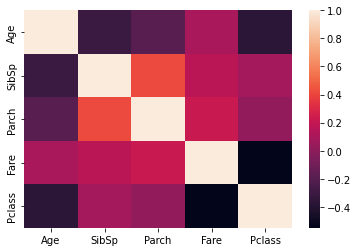

In [18]:
data_num = train_data[['Age','SibSp','Parch','Fare','Pclass']]
print(data_num.corr())
sns.heatmap(data_num.corr())

In [19]:
pd.pivot_table(train_data,index= 'Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


Tabela powyżej pokazuje jaka była średnia w kategoriach pokazanych np średnia wieku pod warunkiem że przeżyli 28,3 roku. 
Wnioski - kto miał większe szanse:
- młodsi? 
- ci co zapłacili więcej? 
- jeśli podróżowałeś z rodzicami?
- w klasie biznesowej?
- bez dzieci/ z mniejsza ilością dzieci ? 

- dane kategoryczne

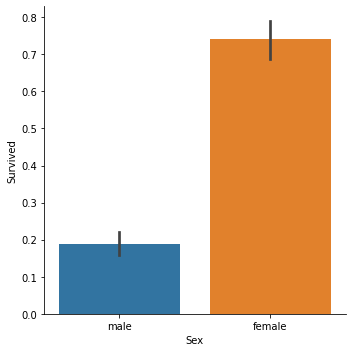

In [20]:
sns.catplot(data=train_data, x='Sex', y='Survived',kind='bar')

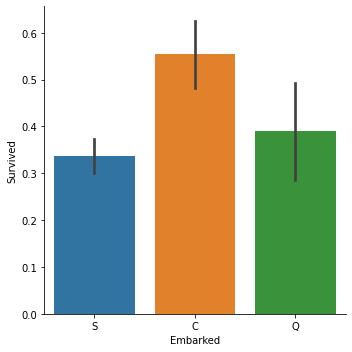

In [21]:
sns.catplot(data=train_data, x='Embarked', y='Survived',kind='bar')

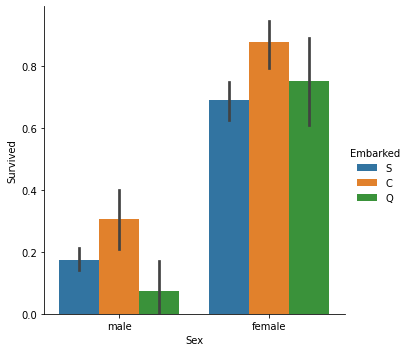

In [22]:
sns.catplot(data=train_data, x='Sex', y='Survived',kind='bar', hue='Embarked')

In [23]:
print(pd.pivot_table(train_data, index ='Survived', columns = 'Sex', values ='Ticket',aggfunc= 'count'  ))

Sex       female  male
Survived              
0             81   468
1            233   109


In [24]:
print(pd.pivot_table(train_data, index ='Survived', columns = 'Embarked', values ='Ticket',aggfunc= 'count'  ))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Wnioski 
1.  -  Kobiety mialy większe szanse na przeżycie 
    - większe szanse mieli również ci z C = Cherbourg
co ciekawe mężczyżni z C = Cherbourg mieli nieproporcionalnie mniejsze szanse 

2. Na chwilę obecną mało ciekawe są wykresy dla Ticket i Cabin - feature enginiering

# Feature Enginiering

Ticket i Cabin nadal nie są zdiagnozowane 

#- Dane Cabin zaczynają się od litery potem liczby. Czy litery oznaczają piętra ? albo konkretną część statku. Można z analizować po literze.
#- Dane biley nie zostaną analizowane 

In [25]:
train_data['cabin_l'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [26]:
print(train_data.cabin_l.value_counts())
pd.pivot_table(train_data,index='Survived',columns='cabin_l', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_l, dtype: int64


cabin_l,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Dane godne uwagi szczególnie te z literą D i E,B tam 3 x więcej ludzi przeżyło. ??
Pytanie tylko dlaczego tak dużo jest braków w danych i czy dane te głownie nie pochodzą z informacji od tych co przeżyli ??

# Przetworzenie danych do modelu 

In [27]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,n


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  cabin_l      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [29]:
train_data.isnull().sum()/len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
cabin_l        0.000000
dtype: float64

Braki danych 
1. Embarked
2. Age - braki wypełnione po średniej wieku 
3. Cabin - brak danych będą w tym wypadku nową kategorią 

# Embarked - sprawdzamy jakie mamy dane 

In [30]:
px.histogram(train_data,x='Embarked', title='Embarked')

zdecydowana większość jest S więc tam przypiszemy braki 

In [31]:
train_data= train_data.fillna({'Embarked':'S'})

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  cabin_l      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [33]:
px.histogram(train_data,x='Age', title='Age')

In [34]:
train_data[pd.isnull(train_data['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,n
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,n
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,n
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,n
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,n
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,n
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,n
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,n


In [35]:
train_data = train_data.fillna(train_data.Age.mean())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  cabin_l      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [36]:
px.histogram(train_data,x='Age', title='Age')

Zadania :
1. Usunąć passengerID, Name, Ticket, Cabin - nie będą brane do analizy 
2. zmienić dane kategoryczne+ sex, embarked, cabin_l
3. stworzyć przedziały dla wieku 
4. stworyzć przedziały dla opłaty 


In [37]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S,n
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,29.699118,Q,n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,29.699118,S,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,29.699118,S,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,29.699118,C,n


In [38]:
#1
train_dataF = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_dataF.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_l
0,0,3,male,22.000000,1,0,7.2500,S,n
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,n
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,n
5,0,3,male,29.699118,0,0,8.4583,Q,n
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,n
8,1,3,female,27.000000,0,2,11.1333,S,n
9,1,2,female,14.000000,1,0,30.0708,C,n


In [39]:
# 2

sex_mapping = {"male": 0, "female": 1}
train_dataF['Sex']= train_dataF['Sex'].map(sex_mapping)

emb_mapping = {"S": 0, "C": 1,"Q":2}
train_dataF['Embarked']= train_dataF['Embarked'].map(emb_mapping)

cab_mapping = {"A": 0, "B": 1,"C":2, "D": 3, "E": 4,"F":5, "G": 6, "T": 7,"n":8}
train_dataF['cabin_l']= train_dataF['cabin_l'].map(cab_mapping)

train_dataF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_l
0,0,3,0,22.0,1,0,7.2500,0,8
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,8
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,8


In [40]:
# 3 
train_dataF['AgeBin']= pd.cut(x=train_dataF.Age, bins=5, labels=[0,1,2,3,4])
train_dataF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_l,AgeBin
0,0,3,0,22.0,1,0,7.2500,0,8,1
1,1,1,1,38.0,1,0,71.2833,1,2,2
2,1,3,1,26.0,0,0,7.9250,0,8,1
3,1,1,1,35.0,1,0,53.1000,0,2,2
4,0,3,0,35.0,0,0,8.0500,0,8,2


In [41]:
# 4
train_dataF['FareBin']= pd.cut(x=train_dataF.Fare, bins=4, labels=[0,1,2,3])
train_dataF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_l,AgeBin,FareBin
0,0,3,0,22.0,1,0,7.2500,0,8,1,0
1,1,1,1,38.0,1,0,71.2833,1,2,2,0
2,1,3,1,26.0,0,0,7.9250,0,8,1,0
3,1,1,1,35.0,1,0,53.1000,0,2,2,0
4,0,3,0,35.0,0,0,8.0500,0,8,2,0
